In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

#각 열 이름에 해당하는 질문
question = pd.read_csv('C:/Users/user/Desktop/Kaggle_survey/schema.csv')
#객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답(16716명 응답)
mcq = pd.read_csv('C:/Users/user/Desktop/Kaggle_survey/multipleChoiceResponses.csv', 
                  encoding="ISO-8859-1", low_memory=False)

# 자주 묻는 질문 FAQ
초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

# Q1. Python과 R중 어떤 언어를 배워야 할까요?

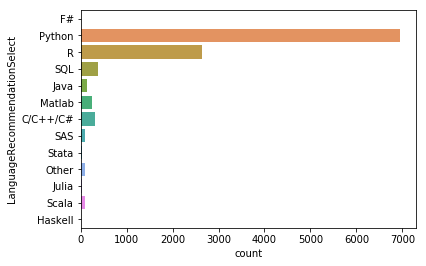

In [2]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)
#파이썬을 명확하게 선호하고 있는 것으로 보여진다.
#전문가와 강사들이 선호하는 언어를 알아보자

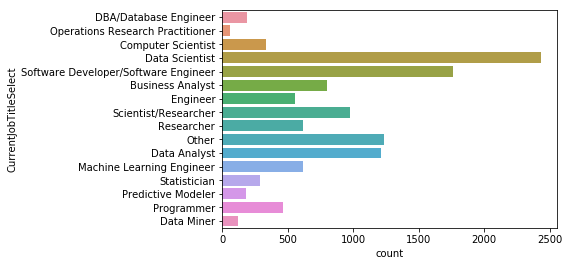

In [3]:
# 현재 하고 있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [4]:
# 현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape
#CJTS가 notnull인 응답자set에 대한 CJTS의 수

(11830,)

(7158, 228)


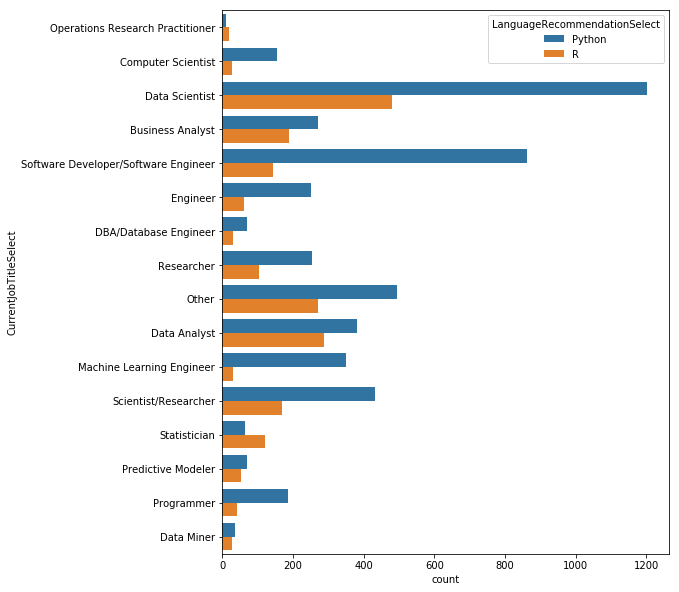

In [5]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python 또는 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', 
              hue='LanguageRecommendationSelect', #범례
              data=data)
#데이터사이언티스트들은 Python을 주로 사용하지만 R을 사용하는 사람들도 제법 된다. 
#하지만 소프트웨어 개발자들은 Python을 훨씬 더 많이 사용하며, Python보다 R을 더 많이 사용하는 직업군은 통계 학자들이다.

# Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?
관련 분야의 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고 있다. 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것이다.

In [6]:
# 1. 데이터사이언스 툴
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))#비율보기

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


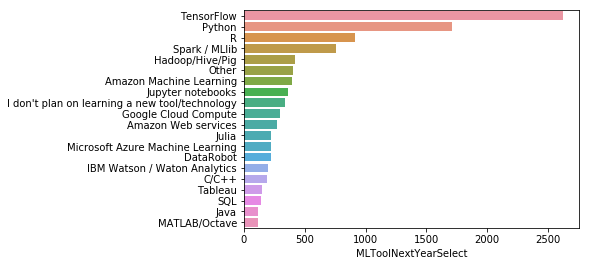

In [7]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)
#구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답했다. 그리고 Python 15%, R 8%
#클라우드는 Amazon ML, GCP, AWS, MS Azure ML, IBM Watson 순으로 응답되었다.

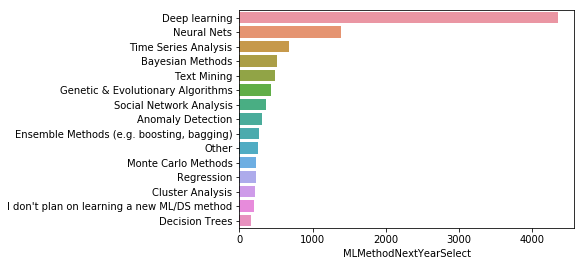

In [8]:
# 2. 다음 해에 주목할 만한 Data Science Methods
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)
#응답에 대한 통계를 보면 딥러닝과 뉴럴넷이 엄청나게 인기가 있을 것이고 시계열 분석, 베이지안, 텍스트 마이닝 등의 내용이 있다. 중간 쯤에 부스팅과 배깅 같은 앙상블 메소드도 있다.

# Q3. 어디에서 데이터 사이언스를 배워야 할까요?

In [9]:
mcq['LearningPlatformSelect'].head(20)

0     College/University,Conferences,Podcasts,Trade ...
1                                                Kaggle
2     Arxiv,College/University,Kaggle,Online courses...
3     Blogs,College/University,Conferences,Friends n...
4                     Arxiv,Conferences,Kaggle,Textbook
5     Kaggle,Online courses,Stack Overflow Q&A,Textbook
6         Arxiv,Blogs,Kaggle,Personal Projects,Textbook
7     College/University,Kaggle,Online courses,Stack...
8     Blogs,Company internal community,Conferences,F...
9     Arxiv,Blogs,Conferences,Kaggle,Non-Kaggle onli...
10                                Kaggle,Online courses
11    Kaggle,Non-Kaggle online communities,Personal ...
12    College/University,Conferences,Kaggle,Online c...
13                                                  NaN
14    Blogs,Conferences,Kaggle,Online courses,Trade ...
15    Kaggle,Personal Projects,Podcasts,Stack Overfl...
16                                                  NaN
17                                              

In [10]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(',')) #,를 기준으로 ""안에 넣는다?
mcq['LearningPlatformSelect'].head(20)

0     [College/University, Conferences, Podcasts, Tr...
1                                              [Kaggle]
2     [Arxiv, College/University, Kaggle, Online cou...
3     [Blogs, College/University, Conferences, Frien...
4                [Arxiv, Conferences, Kaggle, Textbook]
5     [Kaggle, Online courses, Stack Overflow Q&A, T...
6     [Arxiv, Blogs, Kaggle, Personal Projects, Text...
7     [College/University, Kaggle, Online courses, S...
8     [Blogs, Company internal community, Conference...
9     [Arxiv, Blogs, Conferences, Kaggle, Non-Kaggle...
10                             [Kaggle, Online courses]
11    [Kaggle, Non-Kaggle online communities, Person...
12    [College/University, Conferences, Kaggle, Onli...
13                                                [nan]
14    [Blogs, Conferences, Kaggle, Online courses, T...
15    [Kaggle, Personal Projects, Podcasts, Stack Ov...
16                                                [nan]
17                                              

In [11]:
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),axis=1)
s.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,College/University,Conferences,Podcasts,Trade book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arxiv,College/University,Kaggle,Online courses,YouTube Videos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Blogs,College/University,Conferences,Friends network,Official documentation,Online courses,Personal Projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arxiv,Conferences,Kaggle,Textbook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Kaggle,Online courses,Stack Overflow Q&A,Textbook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arxiv,Blogs,Kaggle,Personal Projects,Textbook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,College/University,Kaggle,Online courses,Stack Overflow Q&A,YouTube Videos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Blogs,Company internal community,Conferences,Friends network,Kaggle,Newsletters,Non-Kaggle online communities,Online courses,YouTube Videos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arxiv,Blogs,Conferences,Kaggle,Non-Kaggle online communities,Official documentation,Online courses,Personal Projects,Podcasts,Stack Overflow Q&A,Textbook,YouTube Videos,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index() #쭉 쌓음, 응답자별로 인덱스
s.head(20)

,level_0,level_1,0
0,0,0,College/University
1,0,1,Conferences
2,0,2,Podcasts
3,0,3,Trade book
4,1,0,Kaggle
5,2,0,Arxiv
6,2,1,College/University
7,2,2,Kaggle
8,2,3,Online courses
9,2,4,YouTube Videos


In [13]:
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1) #쭉 쌓음, 한 응답자의 응답에 순서대로 인덱스
s.head(20)

,level_1,0
0,0,College/University
0,1,Conferences
0,2,Podcasts
0,3,Trade book
1,0,Kaggle
2,0,Arxiv
2,1,College/University
2,2,Kaggle
2,3,Online courses
2,4,YouTube Videos


In [14]:
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True) #다중선택이라 하나씩 떼놓은 것!
s.head(20)

0        College/University
0               Conferences
0                  Podcasts
0                Trade book
1                    Kaggle
2                     Arxiv
2        College/University
2                    Kaggle
2            Online courses
2            YouTube Videos
3                     Blogs
3        College/University
3               Conferences
3           Friends network
3    Official documentation
3            Online courses
3         Personal Projects
4                     Arxiv
4               Conferences
4                    Kaggle
dtype: object

In [15]:
s.name = 'platform'
s.head(20)

0        College/University
0               Conferences
0                  Podcasts
0                Trade book
1                    Kaggle
2                     Arxiv
2        College/University
2                    Kaggle
2            Online courses
2            YouTube Videos
3                     Blogs
3        College/University
3               Conferences
3           Friends network
3    Official documentation
3            Online courses
3         Personal Projects
4                     Arxiv
4               Conferences
4                    Kaggle
Name: platform, dtype: object

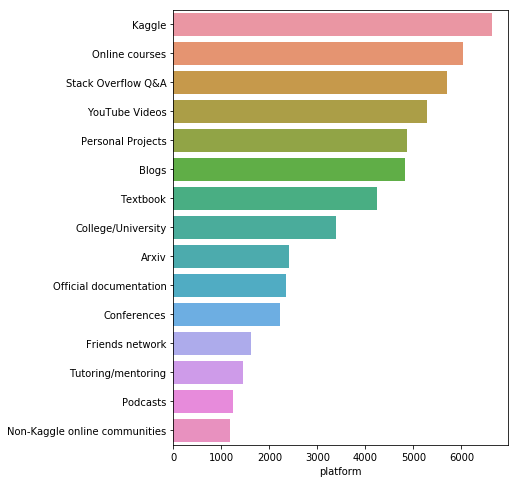

In [16]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15) #NaN제외 
sns.barplot(y=data.index, x=data)

#Kaggle은 우리 응답자들 사이에서 가장 인기있는 학습 플랫폼
#그러나 이 설문 조사를 실시한 곳이 Kaggle이기 때문에 응답이 편향되었을 수 있음
#온라인, 스택 오버플로, 유튜브 상위 5 대 최우수 학습 플랫폼은 대학 학위나 교과서의 중요도보다 높다.

In [17]:
#설문결과에서 LearningPlatformUsefulness가 들어간 질문을 가져온다.
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1] # -1?

In [18]:
question.loc[question['Column'].str.contains('Useful')]

,Column,Question,Asked
28,LearningPlatformUsefulnessArxiv,How useful did you find these platforms & reso...,All
29,LearningPlatformUsefulnessBlogs,How useful did you find these platforms & reso...,All
30,LearningPlatformUsefulnessCollege,How useful did you find these platforms & reso...,All
31,LearningPlatformUsefulnessCompany,How useful did you find these platforms & reso...,All
32,LearningPlatformUsefulnessConferences,How useful did you find these platforms & reso...,All
33,LearningPlatformUsefulnessFriends,How useful did you find these platforms & reso...,All
34,LearningPlatformUsefulnessKaggle,How useful did you find these platforms & reso...,All
35,LearningPlatformUsefulnessNewsletters,How useful did you find these platforms & reso...,All
36,LearningPlatformUsefulnessCommunities,How useful did you find these platforms & reso...,All
37,LearningPlatformUsefulnessCommunitiesFreeForm,How useful did you find these platforms & reso...,All


In [19]:
use_features

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

In [20]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a #앞에서 LPU만큼을 빼고 뒤에만 잘라온다.
                                                         #LPU의 길이 다음부터 끝까지 가져온다.
fdf

{'Arxiv': Very useful        0.550397
 Somewhat useful    0.434128
 Not Useful         0.015475
 Name: LearningPlatformUsefulnessArxiv, dtype: float64,
 'Blogs': Somewhat useful    0.504932
 Very useful        0.485624
 Not Useful         0.009444
 Name: LearningPlatformUsefulnessBlogs, dtype: float64,
 'College': Very useful        0.551652
 Somewhat useful    0.418279
 Not Useful         0.030068
 Name: LearningPlatformUsefulnessCollege, dtype: float64,
 'Company': Somewhat useful    0.511723
 Very useful        0.446483
 Not Useful         0.041794
 Name: LearningPlatformUsefulnessCompany, dtype: float64,
 'Conferences': Somewhat useful    0.598075
 Very useful        0.347388
 Not Useful         0.054537
 Name: LearningPlatformUsefulnessConferences, dtype: float64,
 'Friends': Somewhat useful    0.489564
 Very useful        0.478178
 Not Useful         0.032258
 Name: LearningPlatformUsefulnessFriends, dtype: float64,
 'Kaggle': Very useful        0.619171
 Somewhat useful    0.372

In [21]:
fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False) #정렬기준이 Very useful
fdf

,Not Useful,Somewhat useful,Very useful
Projects,0.008135,0.247184,0.744681
Courses,0.007844,0.292056,0.700100
SO,0.011348,0.362411,0.626241
Kaggle,0.008507,0.372323,0.619171
Tutoring,0.022440,0.399018,0.578541
Textbook,0.016503,0.429562,0.553934
College,0.030068,0.418279,0.551652
Arxiv,0.015475,0.434128,0.550397
Documentation,0.018096,0.459716,0.522189
Communities,0.014011,0.496497,0.489492


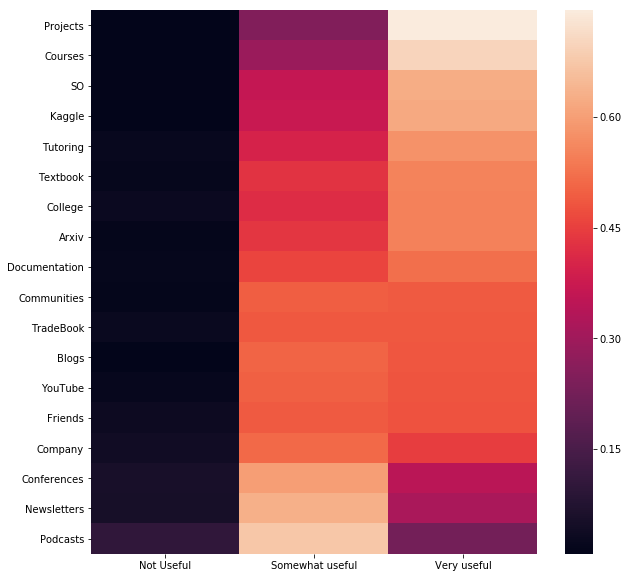

In [22]:
# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False))

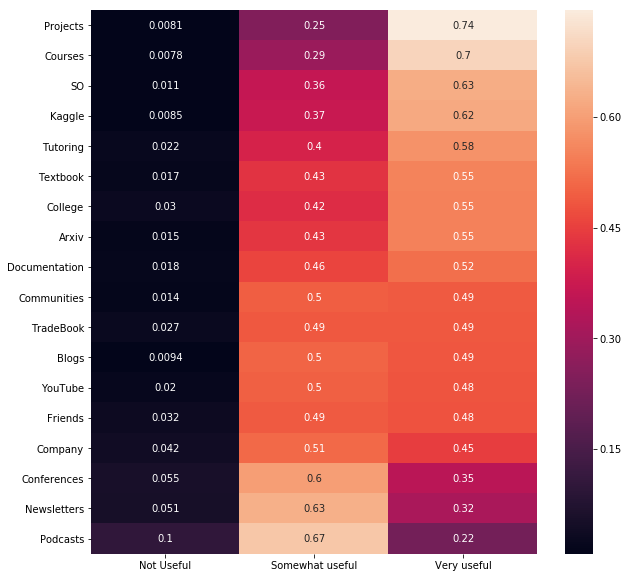

In [23]:
# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True) #수치넣기

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

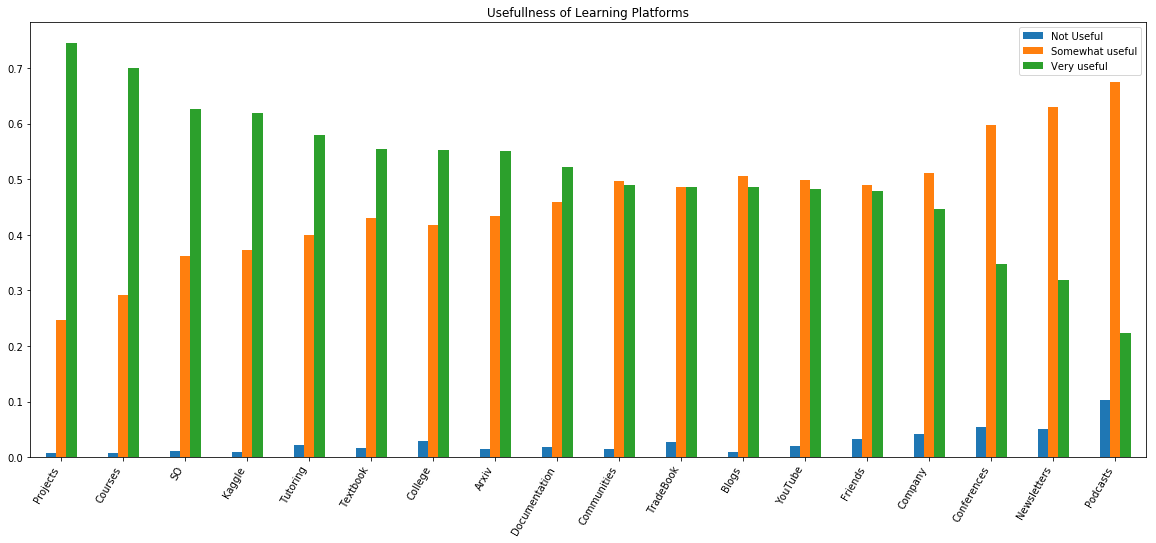

In [24]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='right')

#실제로 프로젝트를 해보는 것에 대해 74.7%의 응답자가 매우 유용하다고 표시했다. SO는 스택오버플로우가 아닐까 싶고, 캐글, 수업, 책이 도움이 많이되는 편이다. 
#팟캐스트는 매우 유용하진 않지만 때때로 유용하다는 응답은 가장 많았다.

In [25]:
#설문결과에서 LearningCategory가 들어간 질문을 가져온다.
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [26]:
#스키마에서 LearningCategory에 대한 질문내용을 본다
qc = question.loc[question[ #loc : 컬럼명같은 이름이나 인덱스기준으로 추출
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [27]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

cdf

{'SelftTaught': 33.36677092074147,
 'OnlineCourses': 27.375514246533598,
 'Work': 15.217593341468994,
 'University': 16.98860691967688,
 'Kaggle': 5.531433795520342,
 'Other': 1.795939644111807}

In [28]:
# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

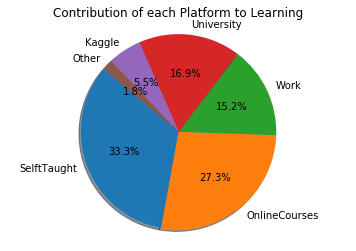

In [29]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

#개인프로젝트를 해보는 것이 가장 많은 도움이 되었으며, 온라인코스와 대학, 업무 그 다음으로 캐글을 통해 배웠다고 응답되었다.